In [ ]:
!pip3 install geopandas

I have done it for the 2018 data, change the files for other years' data


In [2]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

DIR = "../../Biokind/June 20/"
FILE_NAME = "coreco.core2018pc.csv"

PATH = os.path.join(DIR, FILE_NAME)


In [3]:
cols_required = ["EIN", "NCCSKEY", "FISYR", "NAME", "STATE", "NTEE1", "ADDRESS", "CITY", "ZIP", "SUBSECCD", "NTMAJ5", "NTMAJ10", "NTMAJ12", "MAJGRPB", "CONT" ]

data = pd.read_csv(PATH)

    

/var/folders/nj/dwvk13854psdbrlb_hz5lxw00000gn/T/ipykernel_92592/220274364.py:3: DtypeWarning: Columns (68,88,99,100,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(PATH)


In [4]:
data.head()

,EIN,ACCPER,ACTIV1,ACTIV2,ACTIV3,ADDRESS,AFCD,ASS_BOY,ASS_EOY,BOND_BOY,...,TOTREV2,TOTREVP,TOTSUPP509,TXEXMPTBNDSPROCEEDS,TXREVNUELEVIED170,TXREVNUELEVIED509,UNSECUREDNOTESEND,VALIDATION_STATE,ZIP,ZIP5
0,10015091,12,0.0,0.0,0.0,PO BOX 13,3.0,62462.0,52629.0,0.0,...,123377.0,140684.0,603178,0.0,0,0,0.0,0.0,07927-0013,7927.0
1,10017496,12,149.0,0.0,0.0,PO BOX 534,3.0,233819.0,223611.0,0.0,...,127023.0,127013.0,552528,0.0,0,0,0.0,0.0,03911-0534,3911.0
2,10024645,6,119.0,59.0,0.0,PO BOX 1441,3.0,2139034.0,2283338.0,0.0,...,941058.0,935915.0,3879007,0.0,0,0,0.0,0.0,04402-1441,4402.0
3,10130427,6,150.0,0.0,0.0,10 HOSPITAL DR,3.0,55816610.0,57596830.0,6150312.0,...,51035581.0,53807754.0,0,0.0,0,0,0.0,0.0,04009-1148,4009.0
4,10132610,12,900.0,901.0,0.0,167 ROGERS RD,3.0,792496.0,756514.0,0.0,...,36304.0,33294.0,7836,0.0,0,0,0.0,0.0,03904-1449,3904.0


In [5]:
df = data[cols_required]


In [6]:
df = df[(df['NTEE1'] == 'E') & (df['SUBSECCD'] == 3) & (df['NTMAJ5'] ==  "HE") & (df['NTMAJ10'] ==  "HE") & df['NTMAJ12'].isin(["EH", "HE"]) & df["MAJGRPB"].isin(["E", "EH", "F", "G", "H"])]


df.to_csv("./final_datasets/nccs_2018_filtered.csv")

df.dtypes

EIN           int64
NCCSKEY     float64
FISYR         int64
NAME         object
STATE        object
NTEE1        object
ADDRESS      object
CITY         object
ZIP          object
SUBSECCD      int64
NTMAJ5       object
NTMAJ10      object
NTMAJ12      object
MAJGRPB      object
CONT        float64
dtype: object

In [9]:
shapefile_path = os.path.join(DIR, "tl_2022_us_state", "tl_2022_us_state.shp")

map_df = gpd.read_file(shapefile_path)

map_df = map_df[~map_df['STUSPS'].isin(['HI', 'AK'])]





In [ ]:

merged_df = map_df.merge(df.head(10000), left_on='STUSPS', right_on='STATE')

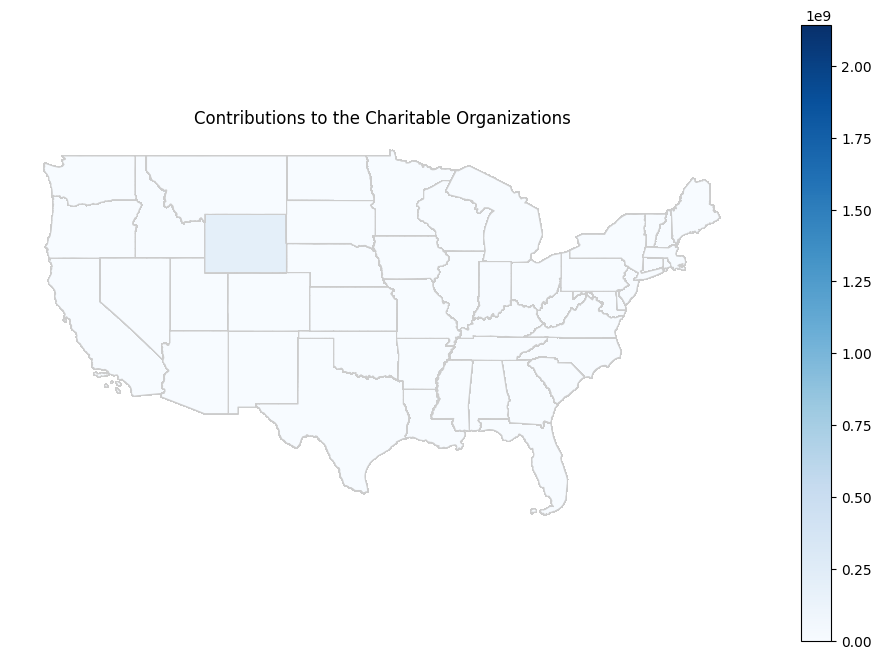

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.axis('off')


merged_df.plot(column='CONT', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


plt.title('Contributions to the Charitable Organizations')


plt.show()
